In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from src.data_processing.processors.guppy_processors.experimental_metadata import ExperimentMetaData, MetaDataFactory
from src.data_processing.processors.guppy_processors.config_loader import ConfigLoader
from src.data_processing.processors.guppy_processors.data_preprocessor import BatchPreprocessor
from src.data_processing.processors.guppy_processors.processing_strategies import ProcessingStrategy, BehaviorProcessingStrategy
from src.data_processing.processors.guppy_processors.aggregators import BehaviorAggregationStrategy, aggregate_data


EXPERIMENTAL_CONFIGS = '/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav Training/claire_cohort/conf/config.yaml'
configs = ConfigLoader(EXPERIMENTAL_CONFIGS)
meta_data_factory = MetaDataFactory(configs)

In [3]:
configs.data_path

PosixPath('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav Training/claire_cohort/analyzed_data')

In [4]:
behavior_strategy_params={
    'config_key': 'behavioral_events',
    'time_window': (-10, 20),
    'events': (('cue', 'lick'), ('cue', 'encoder'))

}
meta_data_factory = MetaDataFactory(configs)
behavior_strategy = BehaviorProcessingStrategy(**behavior_strategy_params)
batch_preprocessor = BatchPreprocessor(meta_data_factory, behavior_strategy)


In [27]:
behavior_strategy.time_window

(-10, 20)

In [6]:
batch_preprocessor.process_data(num_processors=4)


In [7]:
files = configs.data_path.rglob('*processed_data.parquet')

In [8]:
from src.data_processing.processors.guppy_processors.aggregators import BehaviorAggregationStrategy, aggregate_data
aggregate_data(configs, BehaviorAggregationStrategy)

In [9]:
df = pd.read_parquet('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav Training/claire_cohort/analyzed_data/aggregated_data/aggregated_behavior_data.parquet')


In [24]:
df.time.nunique()

41

In [16]:
test_df = df.reset_index(drop = True).query("subject == 3816 & date == '2024-02-06'")
test_df

,lick_aligned_to_cue,encoder_aligned_to_cue,subject,user,date,time
0,0.172414,4.137931,3816.0,User,2024-02-06,21.0
1,0.172414,1.724138,3816.0,User,2024-02-06,21.0
2,0.172414,3.620690,3816.0,User,2024-02-06,21.0
3,0.344828,4.482759,3816.0,User,2024-02-06,21.0
4,0.000000,1.379310,3816.0,User,2024-02-06,21.0
...,...,...,...,...,...,...
150,0.689655,3.275862,3816.0,User,2024-02-06,21.0
151,0.344828,4.827586,3816.0,User,2024-02-06,21.0
152,0.344828,3.275862,3816.0,User,2024-02-06,21.0
153,0.000000,4.482759,3816.0,User,2024-02-06,21.0


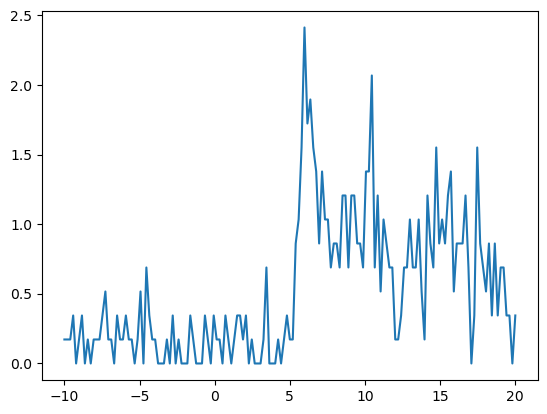

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(-10, 20, 155), test_df['lick_aligned_to_cue'],)